### Compares hydraulics and quality analysis functions.
This example contains:
* Load a network.
* Set simulation duration.
* Test hydraulics and quality analysis functions.
* Step by step hydraulic analysis.
* Step by step quality analysis.
* Unload library.
* Run time d.getComputedTimeSeries.

In [1]:
import time
from epyt import epanet

# Load network
d = epanet('Net1.inp')

EPANET version 20200 loaded (EPyT version 0.0.1).
Input File Net1.inp loaded successfully.



In [2]:
# Set simulation duration.
hours = 100
d.setTimeSimulationDuration(hours * 3600)

# Test hydraulics and quality analysis functions.
# Using ENepanet, create and read binary file.
start_results = time.time()
Results = d.getComputedTimeSeries()
stop_results = time.time()

# Using the functions(ENopenH, ENinit, ENrunH, ENgetnodevalue/&ENgetlinkvalue, ENnextH, ENcloseH).
start_hydraulic = time.time()
Hydraulics = d.getComputedHydraulicTimeSeries()
stop_hydraulic = time.time()

# ENopenQ, ENinitQ, ENrunQ, ENgetnodevalue/&ENgetlinkvalue, ENstepQ, ENcloseQ
start_quality = time.time()
Quality = d.getComputedQualityTimeSeries()
stop_quality = time.time()

# Pipeindex 4 and nodeindex 6 # start from 0
pipeindex = 4 - 1
nodeindex = 6 - 1

# Step by step hydraulic analysis.
d.openHydraulicAnalysis()
d.initializeHydraulicAnalysis()
tstep, P, T_H, D, H, F = 1, [], [], [], [], []
while tstep > 0:
    t = d.runHydraulicAnalysis()
    P.append(d.getNodePressure())
    D.append(d.getNodeActualDemand())
    H.append(d.getNodeHydraulicHead())
    F.append(d.getLinkFlows())
    T_H.append(t)
    tstep = d.nextHydraulicAnalysisStep()
d.closeHydraulicAnalysis()

# Step by step quality analysis.
d.setTimeSimulationDuration(86400)
d.setTimeQualityStep(3600)
d.solveCompleteHydraulics() 
d.openQualityAnalysis()
d.initializeQualityAnalysis()
tleft, P, T_Q, Q = 1, [], [], []
sim_duration = d.getTimeSimulationDuration()
while tleft > 0 or t < sim_duration:
    t = d.runQualityAnalysis()
    Q.append(d.getNodeActualQuality())
    T_Q.append(t)
    tleft = d.stepQualityAnalysisTimeLeft()
d.closeQualityAnalysis()

In [3]:
# Unload library.
d.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



In [4]:
# Run time d.getComputedTimeSeries.
print(f'\nSimulation duration: {hours} hours\n')
print(f'Run Time of function d.getComputedTimeSeries: {stop_results - start_results:.5}  (sec)')
print(f'Run Time of function d.getComputedHydraulicTimeSeries: {stop_hydraulic - start_hydraulic:.5} (sec)')
print(f'Run Time of function d.getComputedQualityTimeSeries: {stop_quality - start_quality:.5} (sec)')


Simulation duration: 100 hours

Run Time of function d.getComputedTimeSeries: 0.056998  (sec)
Run Time of function d.getComputedHydraulicTimeSeries: 0.048 (sec)
Run Time of function d.getComputedQualityTimeSeries: 0.15824 (sec)


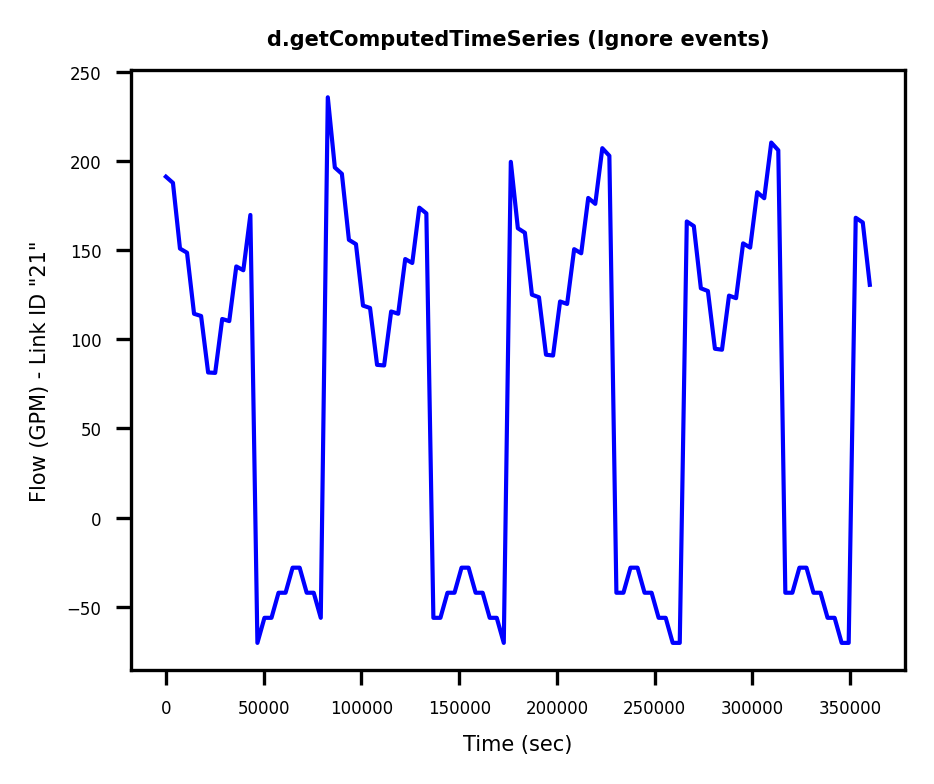

In [5]:
d.plot_ts(X=Results.Time, Y=Results.Flow[:, pipeindex], title='d.getComputedTimeSeries (Ignore events)',
          xlabel='Time (sec)', ylabel='Flow (' + d.LinkFlowUnits + ') - Link ID "' + d.LinkNameID[pipeindex] + '"',
          marker=None)

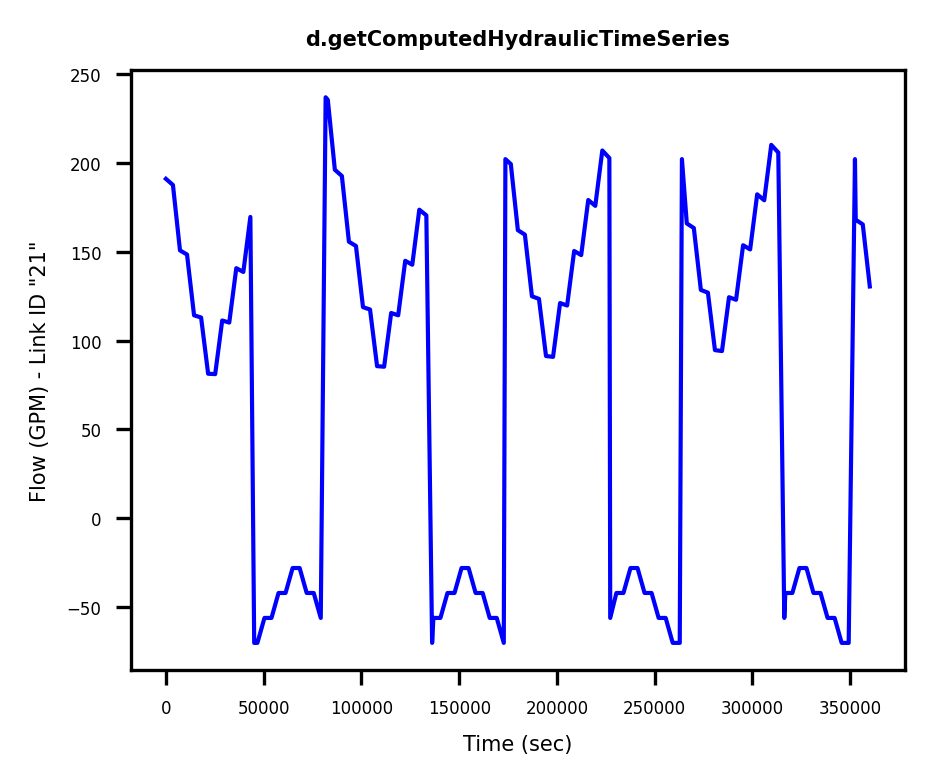

In [6]:
d.plot_ts(X=Hydraulics.Time, Y=d.to_array(F)[:, pipeindex], title='d.getComputedHydraulicTimeSeries',
          xlabel='Time (sec)', ylabel='Flow (' + d.LinkFlowUnits + ') - Link ID "' + d.LinkNameID[pipeindex] + '"', 
          marker=None)

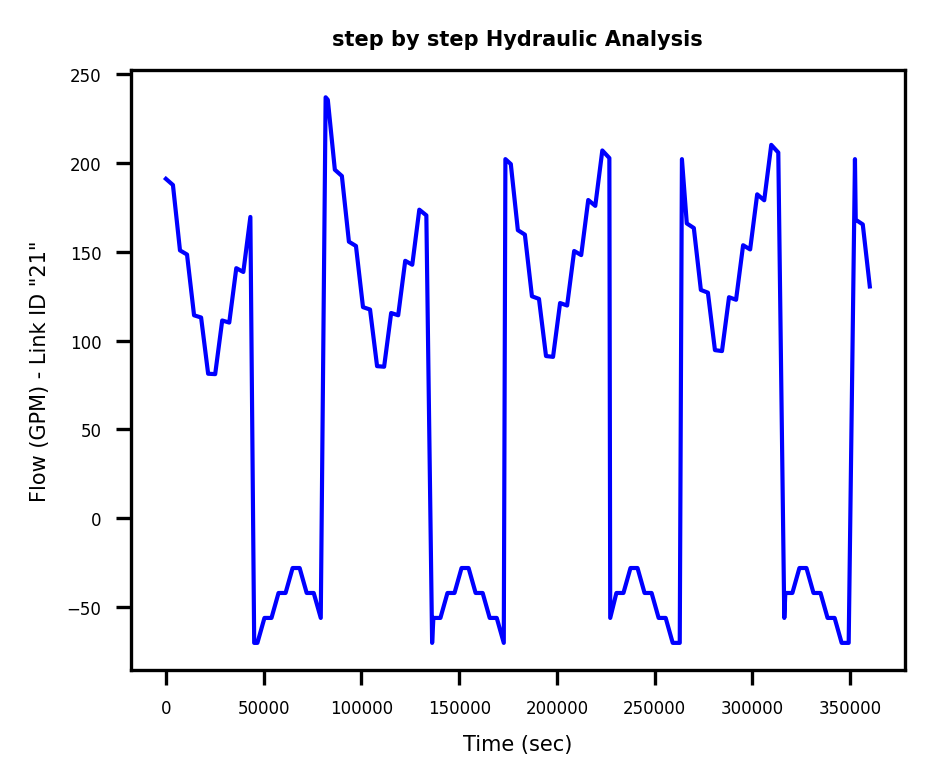

In [7]:
d.plot_ts(X=T_H, Y=d.to_array(F)[:, pipeindex], title='step by step Hydraulic Analysis',
          xlabel='Time (sec)', ylabel='Flow (' + d.LinkFlowUnits + ') - Link ID "' + d.LinkNameID[pipeindex] + '"', 
          marker=None)

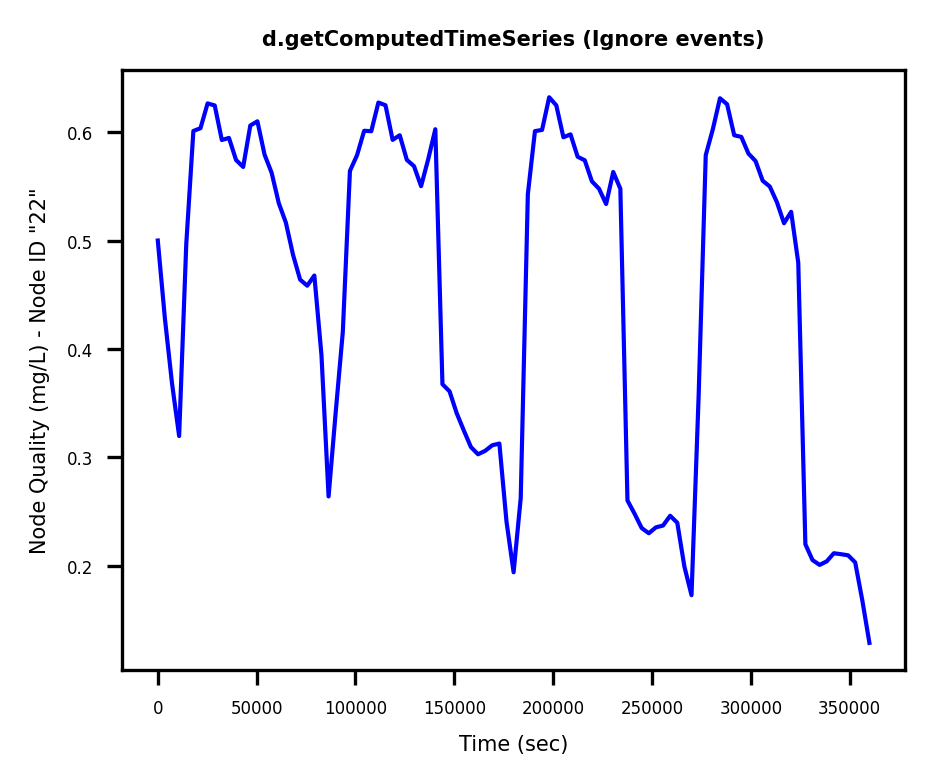

In [8]:
d.plot_ts(X=Results.Time, Y=Results.NodeQuality[:, nodeindex], title='d.getComputedTimeSeries (Ignore events)',
          xlabel='Time (sec)', ylabel='Node Quality (' + d.QualityChemUnits + ') - Node ID "' + d.NodeNameID[nodeindex] + '"',
          marker=None)

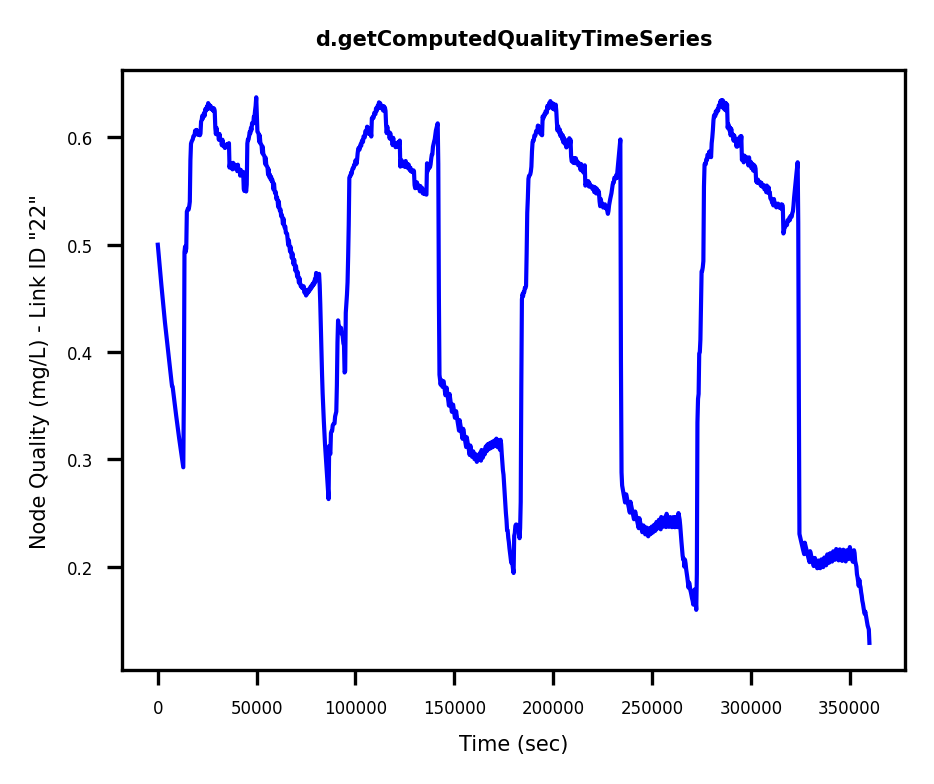

In [9]:
d.plot_ts(X=Quality.Time, Y=Quality.NodeQuality[:, nodeindex], title='d.getComputedQualityTimeSeries',
          xlabel='Time (sec)', ylabel='Node Quality (' + d.QualityChemUnits + ') - Link ID "' + d.NodeNameID[nodeindex] + '"',
          marker=None)

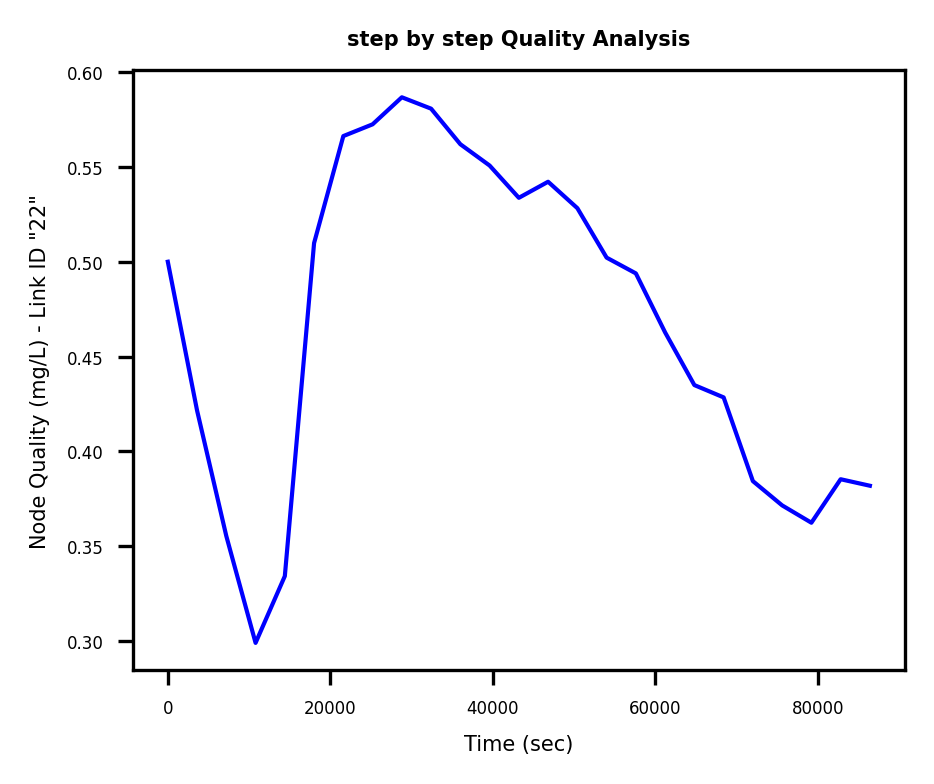

In [10]:
d.plot_ts(X=T_Q, Y=d.to_array(Q)[:, pipeindex], title='step by step Quality Analysis',
          xlabel='Time (sec)', ylabel='Node Quality (' + d.QualityChemUnits + ') - Link ID "' + d.NodeNameID[nodeindex] + '"',
          marker=None)